<a href="https://colab.research.google.com/github/Jhonnety/fraud_transactions/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fradulent transactions

Data Dictionary

- step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
- type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
- amount: amount of the transaction in local currency
- nameOrig: customer who started the transaction
- oldbalanceOrg: initial balance before the transaction
- newbalanceOrig: customer's balance after the transaction.
- nameDest: recipient ID of the transaction.
- oldbalanceDest: initial recipient balance before the transaction.
- newbalanceDest: recipient's balance after the transaction.
- isFraud: identifies a fraudulent transaction (1) and non fraudulent (0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/semestre 10/COIL/Fraud.csv')

In [ ]:
# Example using a NumPy array
print("NumPy array shape:", df.shape)
print(df.describe())

NumPy array shape: (6362620, 11)
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25% 

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Analysis of data.

Before starting to apply machine learning techniques, we must perform a preliminary analysis of the data, to get an idea of each variable we are going to be analysing.

### Data size

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

As can be seen in the code above, the size of the database is conformed by 6,362,620 data entries spread across 11 variables.

### Description of variables

| Variable        | Type        | Nature       | Scale     | Observation  |
|-----------------|-------------|--------------|-----------|--------------|
| step            |  Numeric                  | Quantitative         |     Ratio      | Discrete
| type            | Categorical | Qualitative  | Nominal   | Polytomous   |
| amount          | Numeric     | Quantitative | Ratio     | Continuous   |
| nameOrig        | Categorical | Qualitative  | Nominal   | Polytomous   |
| oldbalanceOr    | Numeric     | Quantitative | Ratio     | Continuous   |
| newbalanceOrig  | Numeric     | Quantitative | Ratio     | Continuous   |
| nameDest        | Categorical | Qualitative  | Nominal   | Polytomous   |
| oldbalanceDest  | Numeric     | Quantitative | Ratio     | Continuous   |
| newbalanceDest  | Numeric     | Quantitative | Ratio     | Continuous   |
| isFraud         | Categorical | Qualitative  | Nominal   | Dichotomous  |
| isFlaggedFraud  | Categorical | Qualitative  | Nominal   | Dichotomous  |

### Data transformations

In [ ]:
df['type'] = df['type'].astype("category")
df['nameOrig'] = df['nameOrig'].astype("category")
df['nameDest'] = df['nameDest'].astype("category")
#df['isFraud'] = df['isFraud'].astype("category")
df['isFlaggedFraud'] = df['isFraud'].astype("category")

We return the variables type, nameOrig, nameDest, isFraud and isFlaggedFraud to categorical type.

In [ ]:
df = df[df['amount'] > 0]

We only consider transactions with amounts greater than 0 because transactions with an amount of 0 are not logic

Now we have  type, nameOrig, nameDest, isFraud and isFlaggedFraud as categorical type.

### Distribution of numerical variables

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06
mean,2.433965e+02,1.798624e+05,8.338852e+05,8.551158e+05,1.100702e+06,1.224997e+06,1.288309e-03
std,1.423311e+02,6.038589e+05,2.888246e+06,2.924052e+06,3.399183e+06,3.674132e+06,3.586990e-02
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338975e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487288e+04,1.420858e+04,0.000000e+00,1.327058e+05,2.146616e+05,0.000000e+00
75%,3.350000e+02,2.087218e+05,1.073160e+05,1.442585e+05,9.430367e+05,1.111910e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


df.describe() shows us the descriptions of the variables, their counting, mean, standard deviation and interquartile ranges.

In [ ]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


It is also important to identify whether our data have null values, fortunately there are no null values that we should omit.

### Data analysis using graphs

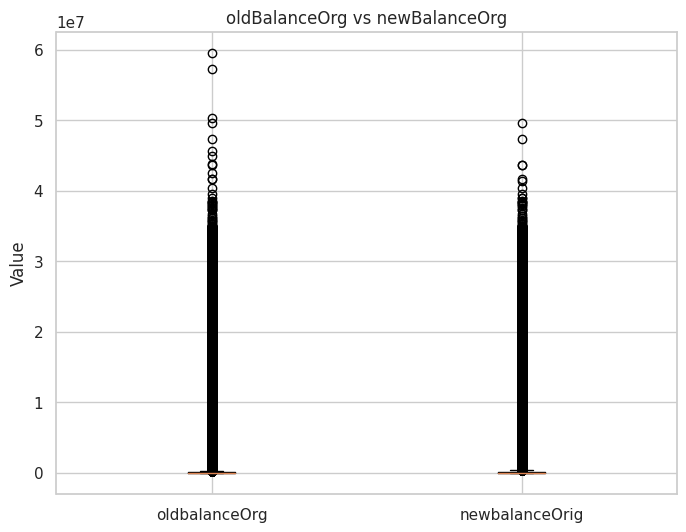

In [ ]:
data = df[['oldbalanceOrg' , 'newbalanceOrig']]

plt.figure(figsize=(8, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('oldBalanceOrg vs newBalanceOrg')
plt.ylabel('Value')
plt.show()

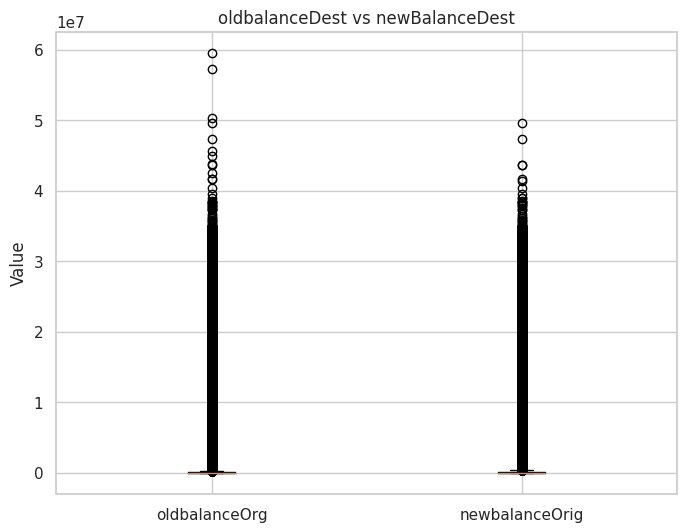

In [ ]:
data = df[['oldbalanceOrg' , 'newbalanceOrig']]

plt.figure(figsize=(8, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('oldbalanceDest vs newBalanceDest')
plt.ylabel('Value')
plt.show()

With so many outliers, with extremely high or low values, it causes measures sensitive to outliers to lose reliability or not be very credible due to these values. This can be observed especially in the calculation of the mean.

Text(0.5, 1.0, 'Number of transactions between 0 and 2e6')

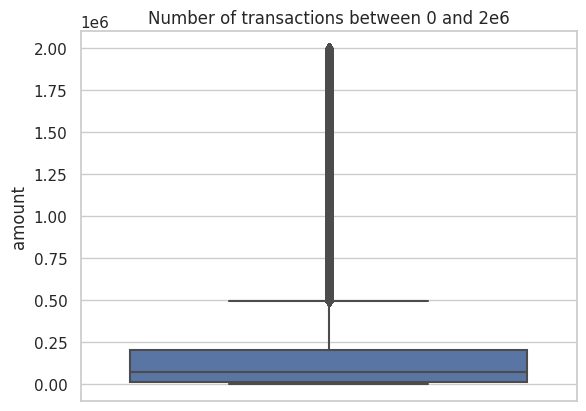

In [ ]:
df_min = df[df['amount'] < 2000000]
sns.boxplot(data=df_min,y='amount')
plt.title("Number of transactions between 0 and 2e6")

We can observe that the majority of the transfer amounts are situated between 0 and 250,000, accounting for 75% of the total data. The outliers begin at approximately the value of 500,000 and beyond

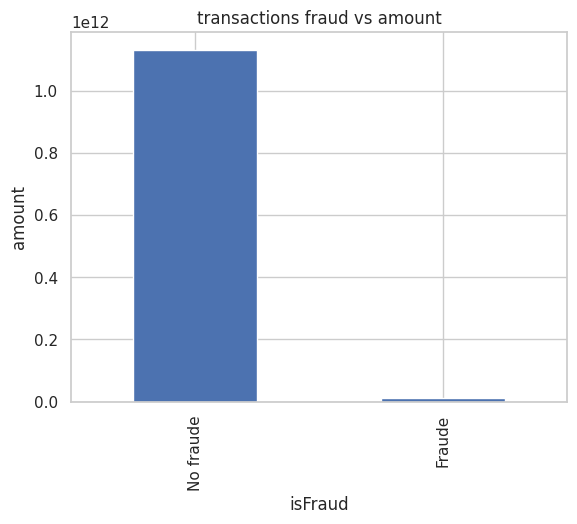

In [ ]:
data = df.groupby('isFraud')['amount'].sum()

data.plot(kind='bar')
plt.title('transactions fraud vs amount')
plt.xlabel('isFraud')
plt.ylabel('amount')
plt.xticks([0,1], labels=['No fraude', 'Fraude'])
plt.show()

As we can see in the bar chart, the most fraude transactions are a in a low amount, less than 1million.

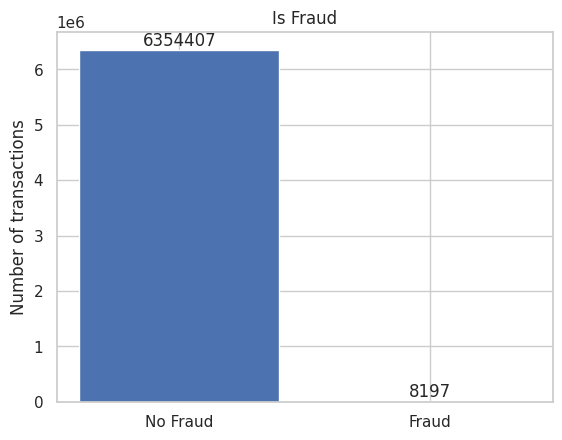

In [ ]:
fraud_counts = df['isFraud'].value_counts()
plt.bar(fraud_counts.index, fraud_counts.values)
plt.xticks(fraud_counts.index, labels=['No Fraud', 'Fraud'])

for i, count in enumerate(fraud_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Is Fraud')
plt.ylabel('Number of transactions')

plt.show()

As we can see, our objective variable called "isFraud" has 6'354.407 no fraud transactions against 8.197 fraud transactions. Clearly is not balanced. We could use a techinque called Undersampling to reduce the data that is cataloged as "No fraud"

Text(0.5, 1.0, 'Number of fraudulent transactions flagged')

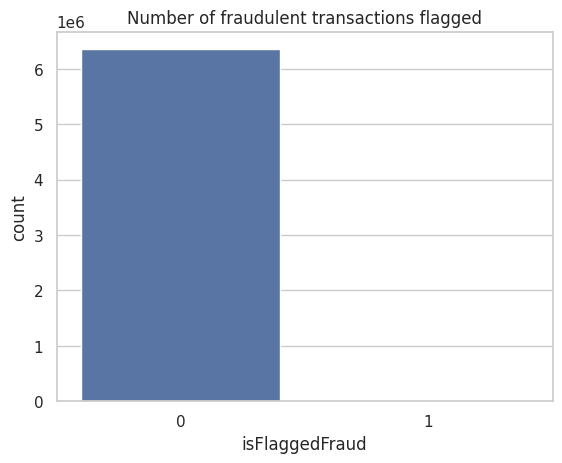

In [ ]:
sns.countplot(x=df["isFlaggedFraud"])
plt.title("Number of fraudulent transactions flagged")

The variable 'is Flagged Fraud' is not relevant because they are only zeros

### Pívot tables

In [ ]:
transaction_fraud = df[df['isFraud'] == 1]
repeated_accounts = transaction_fraud['nameOrig'].value_counts()

In [ ]:
repeated_accounts_df = repeated_accounts.reset_index()
repeated_accounts_df.columns = ['Account', 'Number of Fraud Transactions']
repeated_accounts_df.head()

,Account,Number of Fraud Transactions
0,C733220553,1
1,C1184786020,1
2,C871433982,1
3,C764461588,1
4,C1558861751,1


In [ ]:
pv = pd.pivot_table(transaction_fraud, index='nameOrig', values='isFraud', aggfunc=['sum'])
pv

,sum
,isFraud
nameOrig,
C1000000639,0
C1000001337,0
C1000001725,0
C1000002591,0
C1000003372,0
...,...
C999996999,0
C999998175,0


In [ ]:
filtered_pv = pv[pv[('sum', 'isFraud')] >= 2]
filtered_pv

,sum
,isFraud
nameDest,
C1013511446,2
C104038589,2
C105660024,2
C1148781766,2
C1185292292,2
C1193568854,2
C1259079602,2
C1366192319,2


In [ ]:
pv=pd.pivot_table(transaction_fraud,index='nameDest', values='isFraud',aggfunc=['sum'])
pv

,sum
,isFraud
nameDest,
C1000004082,0
C1000004940,0
C1000013769,0
C100001587,0
C1000015936,0
...,...
M999998692,0
M99999900,0


In [ ]:
filtered_pv = pv[pv[('sum', 'isFraud')] >= 2]
filtered_pv

With the last pivot table we can identify the accounts that are most used to receive fraudulent transactions.

Were there periods of fraudulent transactions?

Text(0.5, 1.0, 'Fraudulent and valid transitions along the time')

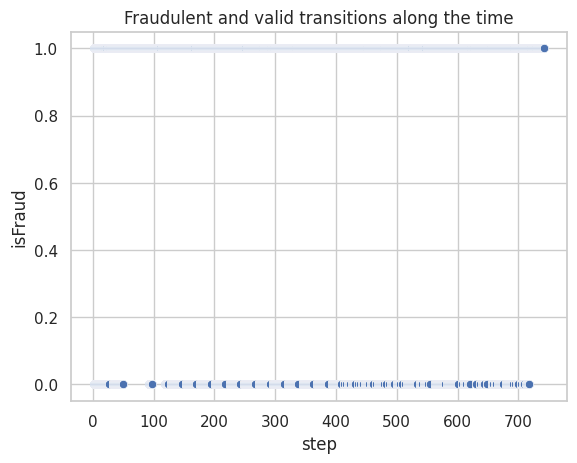

In [ ]:
sns.scatterplot(data=df, x="step", y="isFraud")
plt.title("Fraudulent and valid transitions along the time")

We can see that there were no notable periods of fraudulent transactions.

Text(0.5, 1.0, 'Total transactions by type')

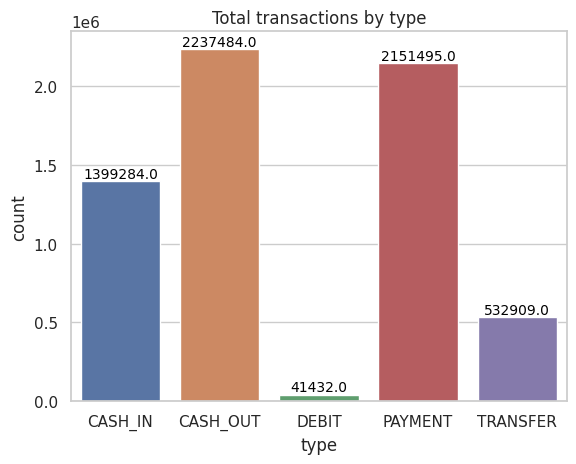

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Total transactions by type")


Text(0.5, 1.0, 'Total fraudulent transactions by type')

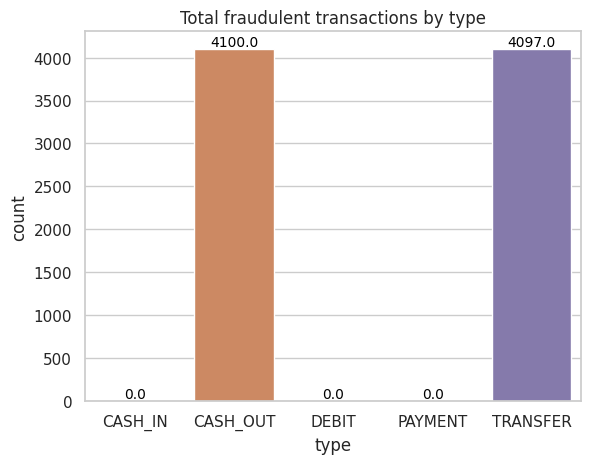

In [ ]:
df_fraud = df[df['isFraud'] == 1]

sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=df_fraud)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Total fraudulent transactions by type")


We can see that the fraudulent transactions are only of  transfer and cash out type.

([<matplotlib.axis.XTick at 0x7e39933a95a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

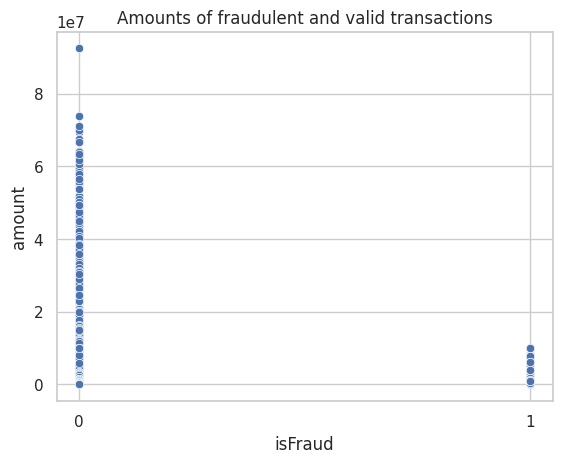

In [ ]:
sns.scatterplot(df, x="isFraud", y="amount")
plt.title("Amounts of fraudulent and valid transactions")
plt.xticks([0, 1])

With the previous graph we can see a specific amount for fraudulent transactions.

In [ ]:
df_fraudulent = df[df['isFraud'] == 1]
df_fraudulent['amount'].describe()

count    8.197000e+03
mean     1.470833e+06
std      2.405723e+06
min      6.380000e+01
25%      1.275643e+05
50%      4.422902e+05
75%      1.525742e+06
max      1.000000e+07
Name: amount, dtype: float64

With the previous graph we can see a specific amount for fraudulent transactions.

In [ ]:
df_fraudulent = df[df['isFraud'] == 1]
df_fraudulent['amount'].describe()

count    8.197000e+03
mean     1.470833e+06
std      2.405723e+06
min      6.380000e+01
25%      1.275643e+05
50%      4.422902e+05
75%      1.525742e+06
max      1.000000e+07
Name: amount, dtype: float64

With the previous mask amd graph we can see that the 'amount' of fraudulent transactions is between 0 and 1 million, so we can consider the 'amount' as an important variable that determines a fraudulent case.

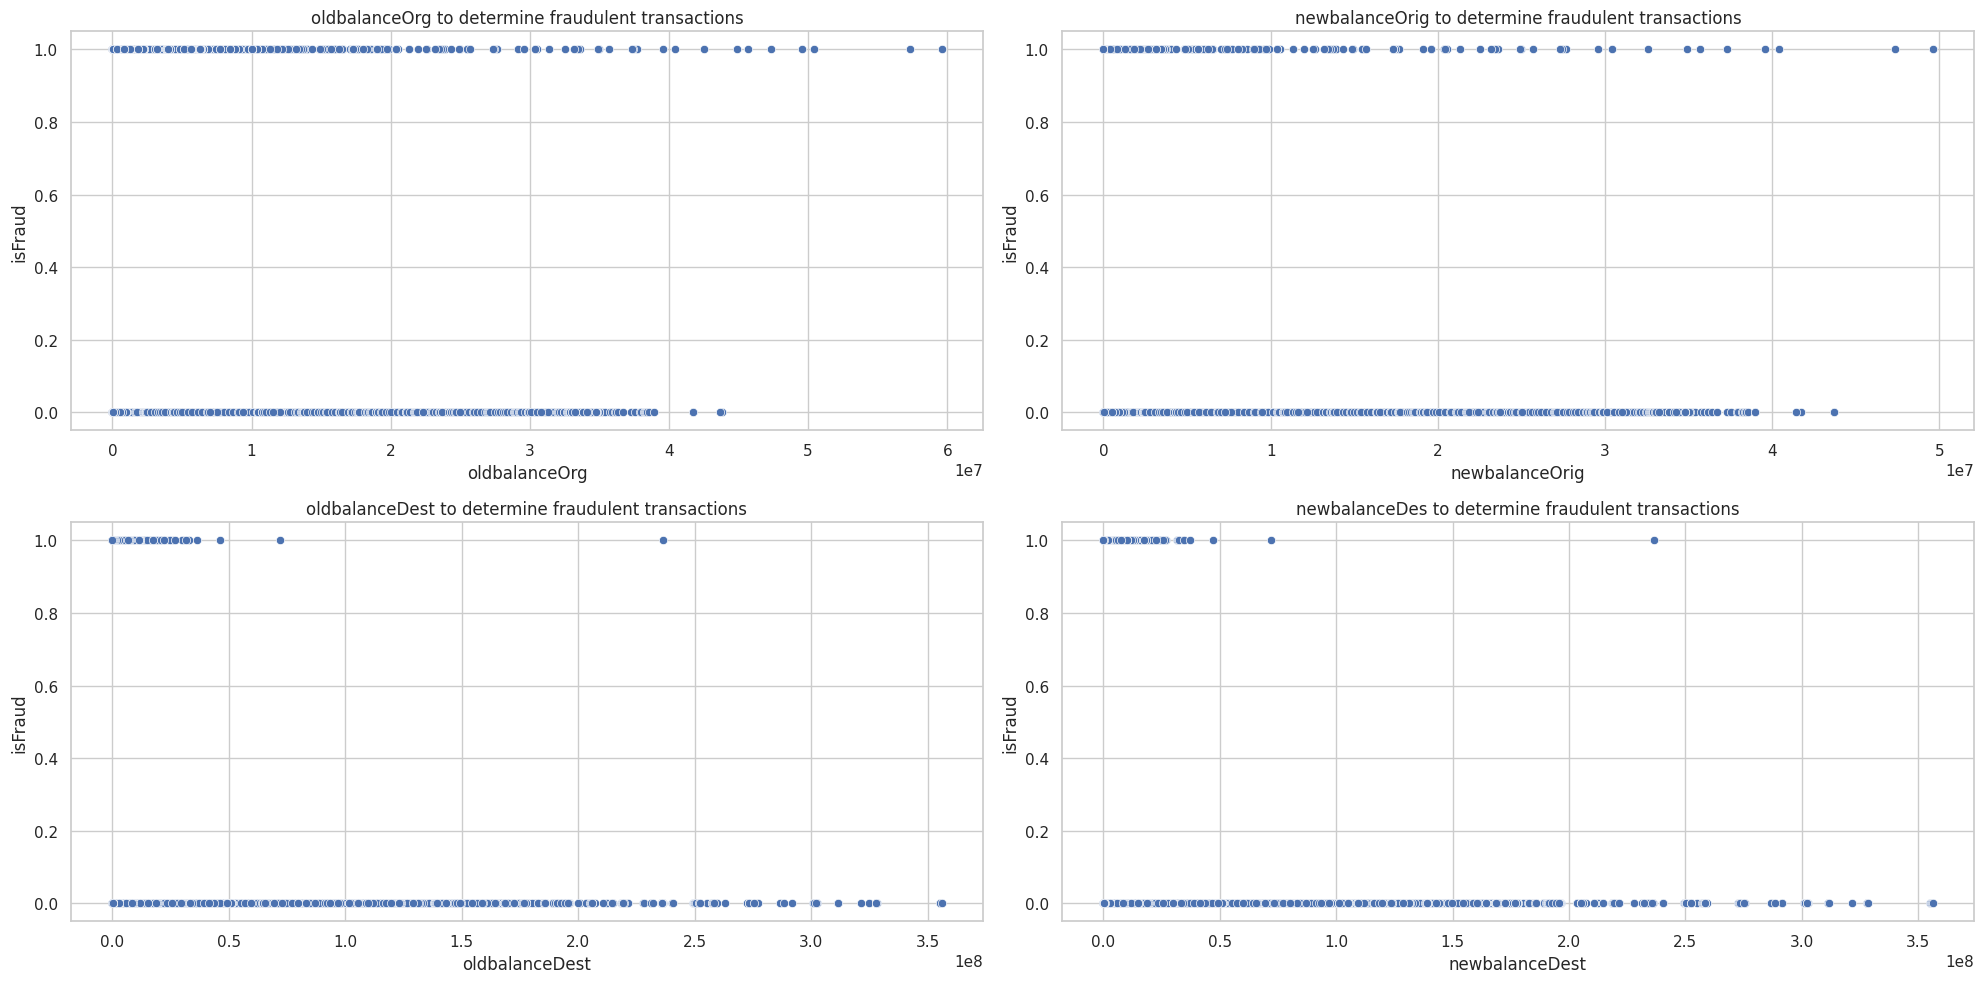

In [ ]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


sns.scatterplot(df, x="oldbalanceOrg", y="isFraud", ax=ax1)
ax1.set_title("oldbalanceOrg to determine fraudulent transactions")

sns.scatterplot(df, x="newbalanceOrig", y="isFraud",ax=ax2)
ax2.set_title("newbalanceOrig to determine fraudulent transactions")

sns.scatterplot(df, x="oldbalanceDest", y="isFraud",ax=ax3)
ax3.set_title("oldbalanceDest to determine fraudulent transactions")

sns.scatterplot(df, x="newbalanceDest", y="isFraud",ax=ax4)
ax4.set_title("newbalanceDes to determine fraudulent transactions")

plt.tight_layout()

We can observe that considering only the variables 'oldbalanceOrg' (initial balance before the transaction) or 'newbalanceOrig' (customer's balance after the transaction) to describe 'isFraud' is not very informative. This approach does not provide a clear range or specific behavior for fraudulent transactions through these graphs.

We can observe that 'nameDest' (ID of the transaction recipient) and 'oldbalanceDest' (initial balance of the recipient before the transaction) exhibit a distinct range where fraudulent transactions are prevalent. These variables will be crucial when used in conjunction with other variables to develop a machine learning model for detecting fraudulent transactions. These range are between 0 and half million

Since we have six million rows, we will create a sample of 200,000 rows in order to generate a pair plot

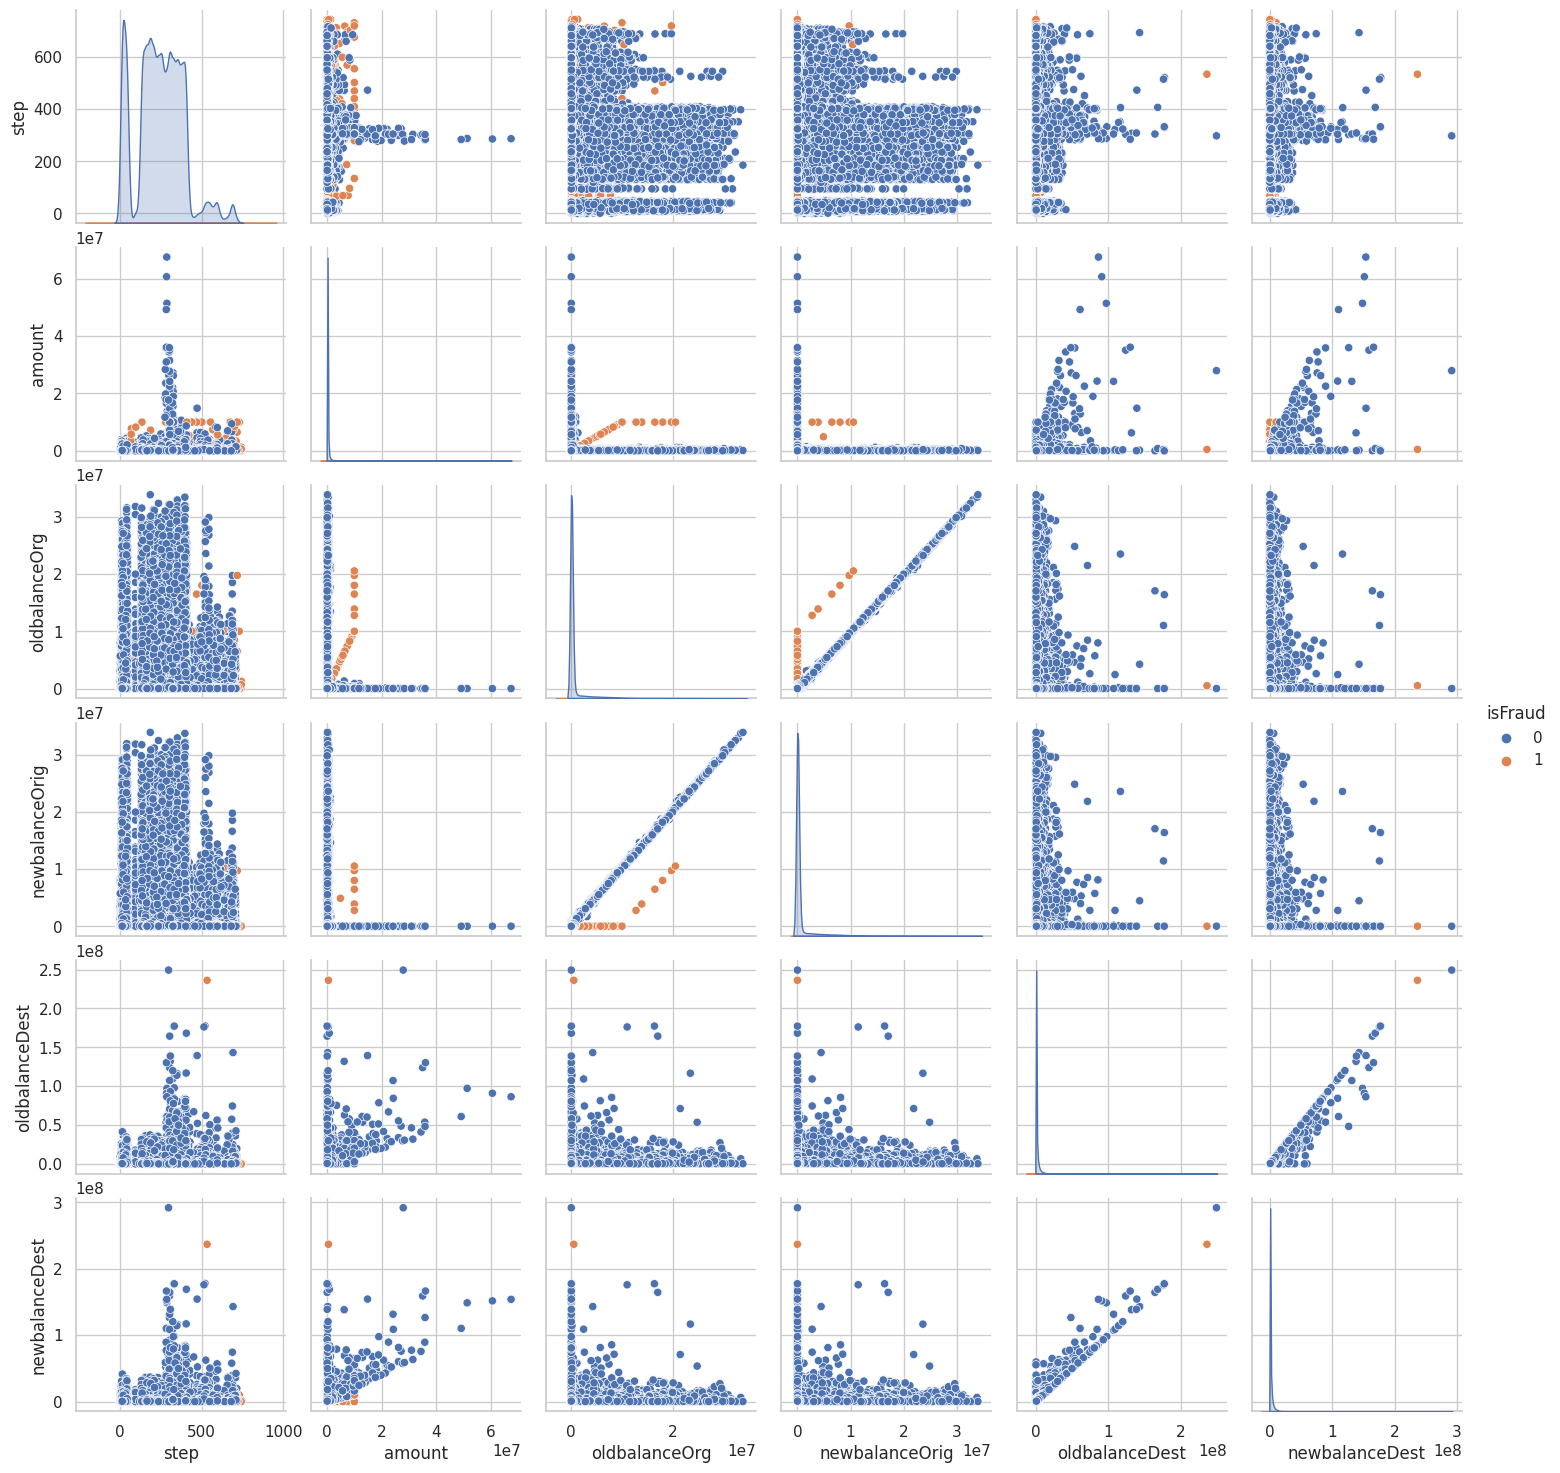

In [ ]:
df_sample = df.sample(200000)
sns.pairplot(df_sample,hue="isFraud")

In the graphs, important trends or behaviors regarding fraudulent transactions can be detected. An initially constant and then linear relationship is observed between the variables **'oldbalanceOrg'** and **'newbalanceOrig'** for determining fraudulent transactions. Such relationships and varaibles will be important for the machine learning model.

We can also identify **similar relationships** and important **for determining the fraudulent transactions** and build a model of machine learning, **these relationships are make with the next variables:**
- **newbalanceOrig and oldbalanceOrg.**
- **oldbalanceOrg and amount**
- **amount and newbalanceOrig**

### Preliminar Data Analysis conclusions

In our preliminary data analysis we were able to identify irrelevant variables for our study, such as variables like step and isFlaggedFraud, as these variables provide a description of qualities that are not relevant to what we are trying to predict, which is whether the transactions analyzed are fraudulent or not. On the other hand, we believe that there are variables that could be relevant to our analysis that are not included in the data we are analyzing, such as the region where the transaction took place (which would indicate whether fraudulent transactions took place at regions that do not correspond to the client ordinary regions) and the time of the day the transactions took place (which would indicate whether fraudulent transactions take place at times that do not correspond to the client's common time zone).van

On the other hand, we consider that a balancing for the objective variable is needed, since the objective variable which is isFraud is highly unbalanced, as we can observe a high disparity between the transactions that are indeed a fraud (which the total count is 6,354,407) in comparison with the variables that are not a fraud (which are 8,197), so a balancing for the objective variable is notoriously needed.

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8197
Name: isFraud, dtype: int64

The following algorithm will be used to balance the target variable for building the machine learning model.

In [ ]:
from sklearn.utils import resample

df_no_fraudulent = df[df['isFraud'] == 0]
df_fraudulent = df[df['isFraud'] == 1]

num_samples_no_fraudulent = 8197

df_no_fraudulent_subsampled = resample(df_no_fraudulent, n_samples=num_samples_no_fraudulent, random_state=42)

df_balanced = pd.concat([df_no_fraudulent_subsampled, df_fraudulent])


In [ ]:
df_balanced['isFraud'].value_counts()

0    8197
1    8197
Name: isFraud, dtype: int64

Now we have the same number of rows as fraudulent transactions and valid transactions.

# Normalize data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder

In [ ]:
df_balanced.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
uwu = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_balanced), columns=uwu)
df_norm.head()

ValueError: ignored